<a href="https://colab.research.google.com/github/athabrani/DeepLearning/blob/main/IMDb_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

In [9]:
num_words = 40000
maxlen = 400


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)


x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

#RNN Model

In [19]:
def build_rnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(num_words, 256, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(128, return_sequences=True)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model


In [20]:
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint("best_model.h5", save_best_only=True)
]

model_rnn = build_rnn_model()

history_rnn = model_rnn.fit(x_train, y_train, validation_split=0.2,
                            epochs=10, batch_size=128, callbacks=callbacks)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.5032 - auc: 0.5035 - loss: 0.7735

157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 190ms/step - accuracy: 0.5032 - auc: 0.5035 - loss: 0.7734 - val_accuracy: 0.5160 - val_auc: 0.5179 - val_loss: 0.6939
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.5248 - auc: 0.5363 - loss: 0.7134

157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 151ms/step - accuracy: 0.5249 - auc: 0.5364 - loss: 0.7134 - val_accuracy: 0.5588 - val_auc: 0.5923 - val_loss: 0.6828
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.5613 - auc: 0.5884 - loss: 0.6888

157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 158ms/step - accuracy: 0.5613 - auc: 0.5885 - loss: 0.6887 - val_accuracy: 0.6572 - val_auc: 0.7562 - val_loss: 0.6273
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.7270 - auc: 0.7988 - loss: 0.5436

157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 152ms/step - accuracy: 0.7274 - auc: 0.7992 - loss: 0.5432 - val_accuracy: 0.8254 - val_auc: 0.9137 - val_loss: 0.4367
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.8995 - auc: 0.9526 - loss: 0.2758

157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 151ms/step - accuracy: 0.8995 - auc: 0.9526 - loss: 0.2757 - val_accuracy: 0.8710 - val_auc: 0.9402 - val_loss: 0.3311
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.9546 - auc: 0.9862 - loss: 0.1422 - val_accuracy: 0.8624 - val_auc: 0.9402 - val_loss: 0.4256
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.9783 - auc: 0.9953 - loss: 0.0751 - val_accuracy: 0.8654 - val_auc: 0.9354 - val_loss: 0.4092
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 148ms/step - accuracy: 0.9905 - auc: 0.9980 - loss: 0.0420 - val_accuracy: 0.8704 - val_auc: 0.9301 - val_loss: 0.4915


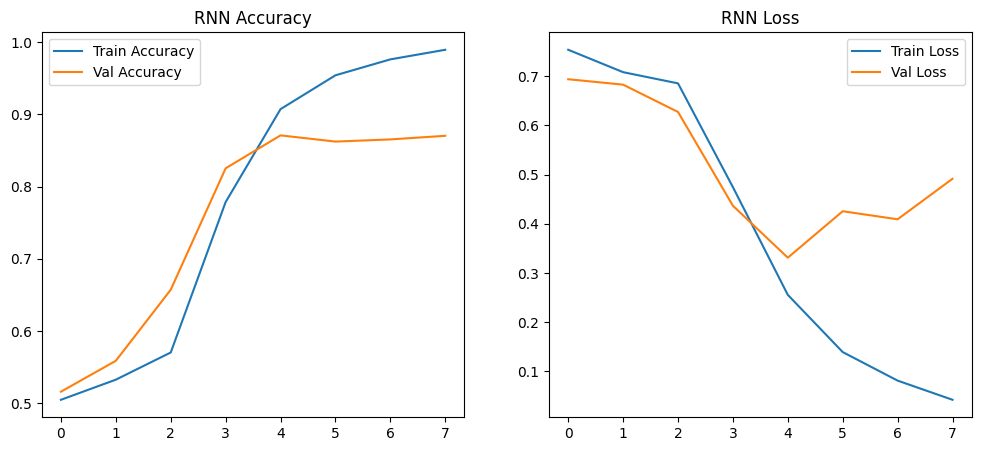

In [21]:
def plot_history(history, title):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.show()

plot_history(history_rnn, 'RNN')

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step
Akurasi: 0.86432
Presisi: 0.846892138939671
Recall: 0.88944
F1-Squared: 0.8676447635398783
AUC: 0.9370257312


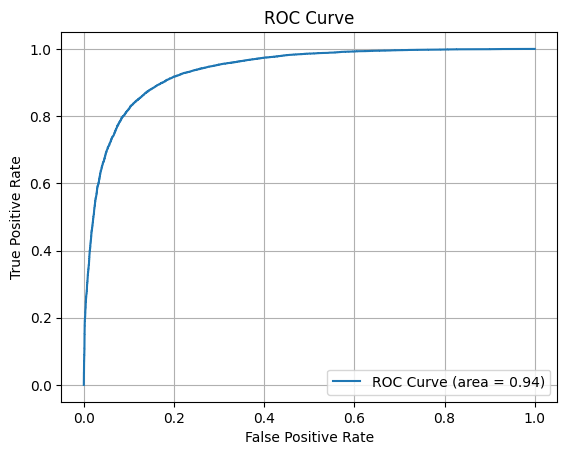

In [22]:
def evaluate_model(model, x_test, y_test):
    y_pred_prob = model.predict(x_test)
    y_pred = (y_pred_prob > 0.5).astype("int32")

    report = classification_report(y_test, y_pred, output_dict=True)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    print("Akurasi:", report['accuracy'])
    print("Presisi:", report['1']['precision'])
    print("Recall:", report['1']['recall'])
    print("F1-Squared:", report['1']['f1-score'])
    print("AUC:", auc_score)

    plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(auc_score))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()

# Evaluasi tiap model
evaluate_model(model_rnn, x_test, y_test)

#LSTM Model

In [25]:
def build_lstm_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(num_words, 256, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

In [33]:
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint("best_model.h5", save_best_only=True)
]

model_lstm = build_lstm_model()
history_lstm = model_lstm.fit(x_train, y_train, validation_split=0.2,
                              epochs=10, batch_size=128, callbacks=callbacks)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.5157 - auc: 0.5268 - loss: 0.6958

157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 158ms/step - accuracy: 0.5160 - auc: 0.5273 - loss: 0.6956 - val_accuracy: 0.6830 - val_auc: 0.7816 - val_loss: 0.6792
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7501 - auc: 0.8167 - loss: 0.5270

157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 150ms/step - accuracy: 0.7502 - auc: 0.8168 - loss: 0.5269 - val_accuracy: 0.6850 - val_auc: 0.9213 - val_loss: 0.5552
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8806 - auc: 0.9383 - loss: 0.3148

157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 150ms/step - accuracy: 0.8807 - auc: 0.9383 - loss: 0.3146 - val_accuracy: 0.8756 - val_auc: 0.9480 - val_loss: 0.3119
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 148ms/step - accuracy: 0.9467 - auc: 0.9812 - loss: 0.1638 - val_accuracy: 0.8800 - val_auc: 0.9508 - val_loss: 0.3238
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 148ms/step - accuracy: 0.9691 - auc: 0.9905 - loss: 0.1041 - val_accuracy: 0.8510 - val_auc: 0.9459 - val_loss: 0.4226
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.9845 - auc: 0.9956 - loss: 0.0610 - val_accuracy: 0.8776 - val_auc: 0.9451 - val_loss: 0.4241


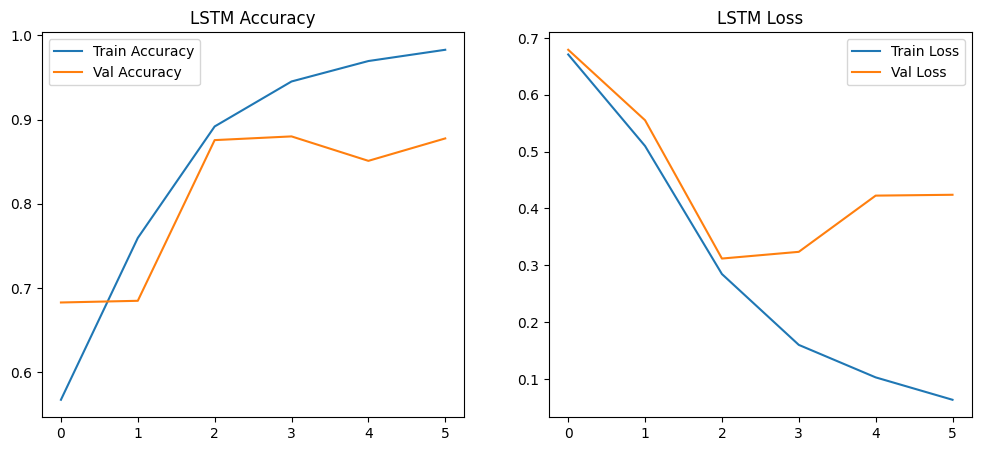

In [37]:
def plot_history(history, title):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.show()

plot_history(history_lstm, 'LSTM')

782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step
Akurasi: 0.86376
Presisi: 0.8455167173252279
Recall: 0.89016
F1-Squared: 0.8672642244738893
AUC: 0.9415912160000001


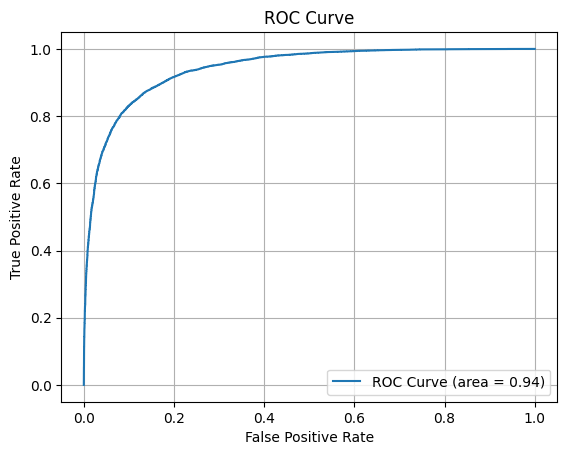

In [38]:
def evaluate_model(model, x_test, y_test):
    y_pred_prob = model.predict(x_test)
    y_pred = (y_pred_prob > 0.5).astype("int32")

    report = classification_report(y_test, y_pred, output_dict=True)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    print("Akurasi:", report['accuracy'])
    print("Presisi:", report['1']['precision'])
    print("Recall:", report['1']['recall'])
    print("F1-Squared:", report['1']['f1-score'])
    print("AUC:", auc_score)

    plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(auc_score))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()

evaluate_model(model_lstm, x_test, y_test)

#GRU Model

In [42]:
def build_gru_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(num_words, 256, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

In [43]:
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint("best_model.h5", save_best_only=True)
]

model_gru = build_gru_model()

history_gru = model_gru.fit(x_train, y_train, validation_split=0.2,
                            epochs=10, batch_size=128, callbacks=callbacks)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.5119 - auc: 0.5221 - loss: 0.7109

157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 148ms/step - accuracy: 0.5121 - auc: 0.5223 - loss: 0.7108 - val_accuracy: 0.6128 - val_auc: 0.6632 - val_loss: 0.6878
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.6504 - auc: 0.7068 - loss: 0.6239

157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 149ms/step - accuracy: 0.6505 - auc: 0.7070 - loss: 0.6237 - val_accuracy: 0.6996 - val_auc: 0.7797 - val_loss: 0.6357
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7775 - auc: 0.8572 - loss: 0.4719

157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.7775 - auc: 0.8573 - loss: 0.4718 - val_accuracy: 0.7524 - val_auc: 0.8410 - val_loss: 0.5063
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8839 - auc: 0.9461 - loss: 0.2983

157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.8839 - auc: 0.9461 - loss: 0.2982 - val_accuracy: 0.8542 - val_auc: 0.9262 - val_loss: 0.3541
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 142ms/step - accuracy: 0.9263 - auc: 0.9749 - loss: 0.2006 - val_accuracy: 0.8550 - val_auc: 0.9357 - val_loss: 0.3708
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 135ms/step - accuracy: 0.9623 - auc: 0.9909 - loss: 0.1166 - val_accuracy: 0.8624 - val_auc: 0.9392 - val_loss: 0.4170
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.9854 - auc: 0.9967 - loss: 0.0569 - val_accuracy: 0.8620 - val_auc: 0.9346 - val_loss: 0.4696


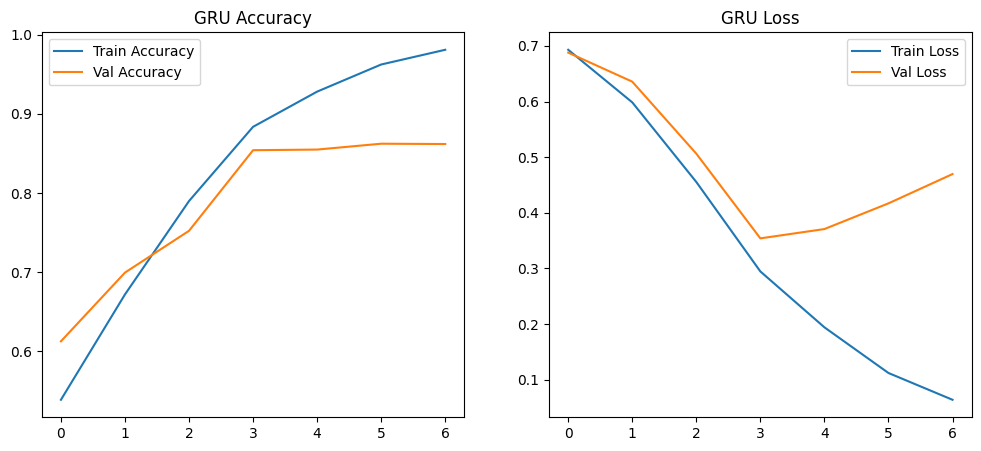

In [44]:
def plot_history(history, title):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.show()

plot_history(history_gru, 'GRU')

782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step
Akurasi: 0.84936
Presisi: 0.8626474007639927
Recall: 0.83104
F1-Squared: 0.8465487735310896
AUC: 0.9240575712


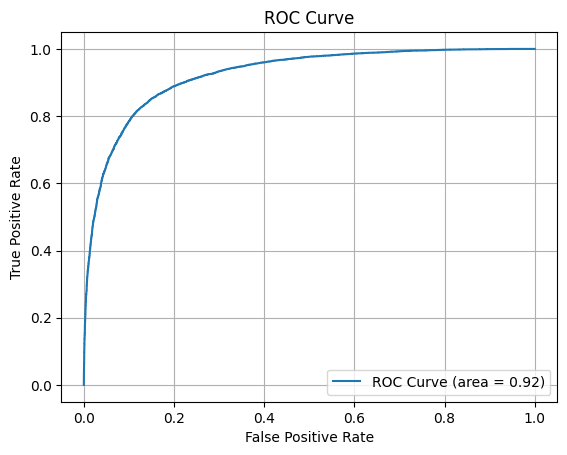

In [45]:
def evaluate_model(model, x_test, y_test):
    y_pred_prob = model.predict(x_test)
    y_pred = (y_pred_prob > 0.5).astype("int32")

    report = classification_report(y_test, y_pred, output_dict=True)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    print("Akurasi:", report['accuracy'])
    print("Presisi:", report['1']['precision'])
    print("Recall:", report['1']['recall'])
    print("F1-Squared:", report['1']['f1-score'])
    print("AUC:", auc_score)

    plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(auc_score))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()

evaluate_model(model_gru, x_test, y_test)

# Penjelasan Matematika dan Evaluasi Model RNN, LSTM, GRU


---

## Perbandingan Hasil Model

| Model | Akurasi | Presisi | Recall | F1-Score | AUC |
|-------|---------|---------|--------|----------|-----|
| **LSTM** | 0.86376 | 0.84552 | 0.89016 | 0.86726 | 0.94159 |
| **RNN** | 0.86432 | 0.84689 | 0.88944 | 0.86764 | 0.93703 |
| **GRU** | 0.84936 | 0.86264 | 0.83104 | 0.84655 | 0.92406 |


---



## 1. Arsitektur Recurrent Neural Network (RNN)

RNN memproses urutan data secara berulang, dengan menyimpan hasil sebelumnya sebagai memori untuk waktu berikutnya.

### Rumus:
$$
h_t = \tanh(W_{xh} \cdot x_t + W_{hh} \cdot h_{t-1} + b_h)
$$

- \( x_t \): input pada waktu ke-\( t \)
- \( h_{t} \): hidden state pada waktu ke-\( t \)
- \( h_{t-1} \): hidden state dari waktu sebelumnya
- \( W_{xh}, W_{hh} \): bobot input dan hidden
- \( b_h \): bias
- \( \tanh \): fungsi aktivasi nonlinear

---

## 2. Arsitektur Long Short-Term Memory (LSTM)

LSTM adalah bentuk khusus dari RNN yang dapat mengingat jangka panjang melalui gate kontrol.

### Forget Gate:
$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$

### Input Gate:
$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$
$$
\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
$$

### Update Cell State:
$$
C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t
$$

### Output Gate:
$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$
$$
h_t = o_t \cdot \tanh(C_t)
$$

---

## 3. Arsitektur Gated Recurrent Unit (GRU)

GRU merupakan alternatif yang lebih ringan dari LSTM.

### Reset Gate:
$$
r_t = \sigma(W_r \cdot [h_{t-1}, x_t] + b_r)
$$

### Update Gate:
$$
z_t = \sigma(W_z \cdot [h_{t-1}, x_t] + b_z)
$$

### Candidate Activation:
$$
\tilde{h}_t = \tanh(W \cdot [r_t * h_{t-1}, x_t] + b)
$$

### Final Output:
$$
h_t = (1 - z_t) \cdot h_{t-1} + z_t \cdot \tilde{h}_t
$$

---

## 4. Binary Crossentropy Loss

Digunakan untuk klasifikasi biner.

### Rumus:
$$
L = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

- \( y_i \): label sebenarnya (0 atau 1)
- \( \hat{y}_i \): prediksi model (antara 0 dan 1)
- \( N \): jumlah data

---

## 5. Precision (Presisi)

Mengukur seberapa banyak prediksi positif yang benar.

### Rumus:
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- \( TP \): True Positive
- \( FP \): False Positive

---

## 6. Recall (Sensitivitas)

Mengukur seberapa banyak data positif yang berhasil diprediksi dengan benar.

### Rumus:
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- \( FN \): False Negative

---

## 7. F1-Score (F1-Squared)

Rata-rata harmonik dari Precision dan Recall.

### Rumus:
$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

## 8. AUC (Area Under Curve)

Mengukur seberapa baik model membedakan antara kelas positif dan negatif.

- Nilai AUC mendekati 1 berarti model sangat baik.

---

## 9. ROC Curve (Receiver Operating Characteristic)

Plot antara True Positive Rate (TPR) dan False Positive Rate (FPR).

### TPR dan FPR:
$$
\text{TPR} = \frac{TP}{TP + FN}
$$
$$
\text{FPR} = \frac{FP}{FP + TN}
$$

---




